# BANKFULL-ADDITIONAL DATASET( to predict if the client will subscribe a term deposit )

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, learning_curve, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import recall_score, f1_score, precision_score, accuracy_score, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, mutual_info_classif, RFE
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

In [38]:
df= pd.read_csv("bank-additional.csv",delimiter=';')

In [39]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no


In [40]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [41]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [42]:
for column in df.columns:
    if df[column].isnull().any():  
        mean_value = df[column].mean()  
        df[column] = df[column].fillna(mean_value) 
df.columns = df.columns.str.strip()

df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

# Initial Summary


In [43]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

### Separating Numerical and Categorical Columns

In [45]:
numerical_columns = df.select_dtypes(include=[int, float]).columns
categorical_columns = df.select_dtypes(include=[object]).columns

print("Numerical columns:", numerical_columns)
print("Categorical columns:", categorical_columns)

Numerical columns: Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')
Categorical columns: Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')


# Box Plot to see Outliers

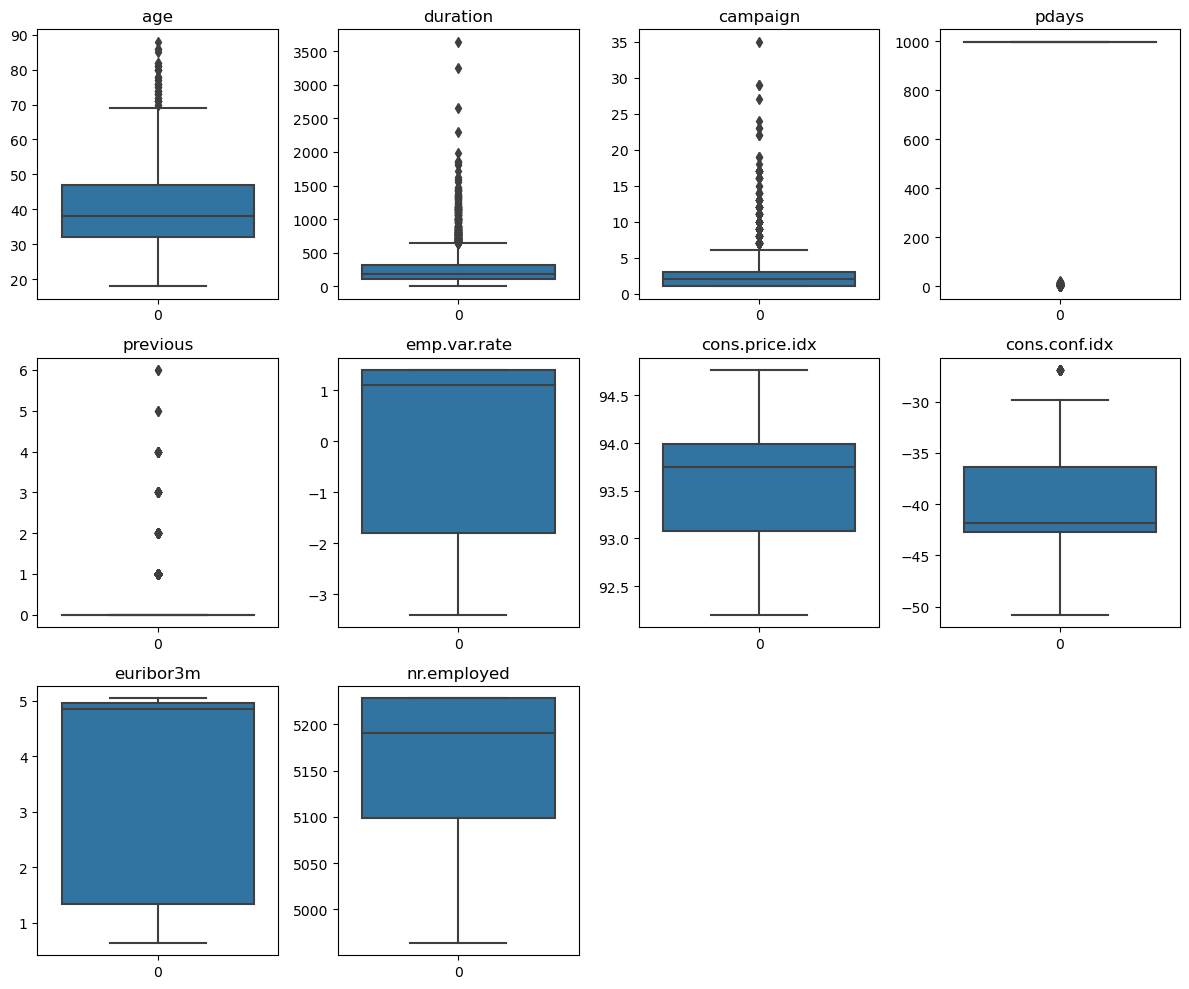

In [46]:
plt.figure(figsize=(12, 10))
num_plots = len(numerical_columns)
num_rows = (num_plots - 1) // 4 + 1  # Calculate the number of rows needed
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, 4, i)  # Adjust the number of columns to 4
    sns.boxplot(df[col])
    plt.title(col)
plt.tight_layout()
plt.show()


## Removing Outliers

In [47]:
def remove_outliers(df):
    for column in df.select_dtypes(include=['int', 'float']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Remove outliers from all numerical columns
df_cleaned = remove_outliers(df)



# Cross Validation (With and Without)

In [48]:
def evaluate_classifier(df, pos_label, dataset_Name):

    # Convert non-numeric columns to numeric using LabelEncoder
    df_numeric = df.apply(LabelEncoder().fit_transform)

    # Impute missing values
    imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
    df_imputed = pd.DataFrame(imputer.fit_transform(df_numeric), columns=df_numeric.columns)

    # Split the dataset into features (X) and target (y)
    X = df_imputed.drop(columns=['y'])
    y = df_imputed['y']

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Normalize the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train K-Nearest Neighbors (KNN) classifier without cross-validation
    knn_no_cv = KNeighborsClassifier()
    knn_no_cv.fit(X_train_scaled, y_train)

    # Evaluate performance metrics without cross-validation
    y_pred_no_cv = knn_no_cv.predict(X_test_scaled)
    accuracy_no_cv = accuracy_score(y_test, y_pred_no_cv)
    precision_no_cv = precision_score(y_test, y_pred_no_cv, pos_label=pos_label)
    recall_no_cv = recall_score(y_test, y_pred_no_cv, pos_label=pos_label)
    f1_score_no_cv = f1_score(y_test, y_pred_no_cv, pos_label=pos_label)
    f1_score_pos_no_cv = f1_score(y_test, y_pred_no_cv, pos_label=pos_label)

    # Calculate F1 score for negative class
    neg_label = 1 if pos_label == 0 else 0
    y_pred_neg_no_cv = 1 - y_pred_no_cv
    f1_score_neg_no_cv = f1_score(1 - y_test, y_pred_neg_no_cv, pos_label=neg_label)

    # Train KNN classifier using k-fold cross-validation
    knn_cv = KNeighborsClassifier()
    cv_results = cross_validate(knn_cv, X_train_scaled, y_train, cv=5, scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

    # Extracting cross-validation scores
    avg_accuracy_cv = np.mean(cv_results['test_accuracy'])
    avg_precision_cv = np.mean(cv_results['test_precision'])
    avg_recall_cv = np.mean(cv_results['test_recall'])
    avg_f1_score_cv = np.mean(cv_results['test_f1'])
    avg_auc_cv = np.mean(cv_results['test_roc_auc'])

    # Calculate F1 score for positive class in cross-validation
    f1_scores_cv_pos = cv_results['test_f1']
    avg_f1_score_cv_pos = np.mean(f1_scores_cv_pos)

    # Calculate F1 score for negative class in cross-validation
    f1_scores_cv_neg = 1 - cv_results['test_f1']  # Since F1 is already computed for the positive class
    avg_f1_score_cv_neg = np.mean(f1_scores_cv_neg)

    # Print evaluation metrics
    print("Dataset Name:", dataset_Name)
    print()
    print("Without Cross-Validation:")
    print("Accuracy:", accuracy_no_cv)
    print("Precision:", precision_no_cv)
    print("Recall:", recall_no_cv)
    print("F1 Score (Positive Class):", f1_score_pos_no_cv)
    print("F1 Score (Negative Class):", f1_score_neg_no_cv)
    print()
    print("With Cross-Validation:")
    print("Accuracy:", avg_accuracy_cv)
    print("Precision:", avg_precision_cv)
    print("Recall:", avg_recall_cv)
    print("F1 Score (Positive Class):", avg_f1_score_cv_pos)
    print("F1 Score (Negative Class):", avg_f1_score_cv_neg)
    print("AUC Score:", avg_auc_cv)

evaluate_classifier(df, 1, 'bankfull-additional dataset')

Dataset Name: bankfull-additional dataset

Without Cross-Validation:
Accuracy: 0.8859223300970874
Precision: 0.4772727272727273
Recall: 0.22826086956521738
F1 Score (Positive Class): 0.30882352941176466
F1 Score (Negative Class): 0.30882352941176466

With Cross-Validation:
Accuracy: 0.9047040971168437
Precision: 0.6184935064935064
Recall: 0.30625978090766826
F1 Score (Positive Class): 0.4066619761139566
F1 Score (Negative Class): 0.5933380238860433
AUC Score: 0.8169176207565829


## Summary Report
### Without Cross-Validation:

Accuracy: 0.8859 (88.59%) - The model correctly classified nearly 89% of the data points. However, this metric can be misleading without considering class balance.

Precision (Positive Class - Subscribed):  0.4773 -  Of the predicted subscriptions, only 47.73% were true positives. This indicates a high rate of false positives (incorrectly predicted subscriptions).

Recall (Positive Class - Subscribed): 0.2283 - The model identified only 22.83% of actual subscribers, suggesting it misses a significant portion of potential customers.

F1 Score (Positive Class - Subscribed): 0.3088 - This balanced metric between precision and recall highlights a significant weakness in identifying true subscribers.
### With Cross-Validation:

Accuracy: 0.9047 (90.47%) - Cross-validation shows a slight improvement in overall accuracy compared to the non-cross-validated case. However, accuracy alone doesn't provide enough context.

Precision (Positive Class - Subscribed): 0.6185 - Precision improves to 61.85%, indicating a decrease in the rate of false positives.

Recall (Positive Class - Subscribed): 0.3063 - Recall remains low (around 30%), suggesting the model still misses a substantial number of actual subscribers.

F1 Score (Positive Class - Subscribed): 0.4067 - The F1 score for the positive class increases, indicating some improvement in identifying true subscribers.

F1 Score (Negative Class - Not Subscribed): 0.5933 - This score suggests the model performs better in identifying customers who won't subscribe.

AUC Score: 0.8169 - The Area Under the ROC Curve (AUC) score is slightly above 0.8, indicating some ability to differentiate between subscribers and non-subscribers. However, it's not exceptional.
### Summary Interpretation:

The model exhibits a significant imbalance in class prediction, favoring the negative class (not subscribed).

While cross-validation improves overall accuracy slightly, the model struggles to identify true subscribers (positive class) with low recall and F1 score.

The model performs better in identifying non-subscribers (negative class), as evidenced by the higher F1 score for the negative class.






# Visual Representation of the Prediction

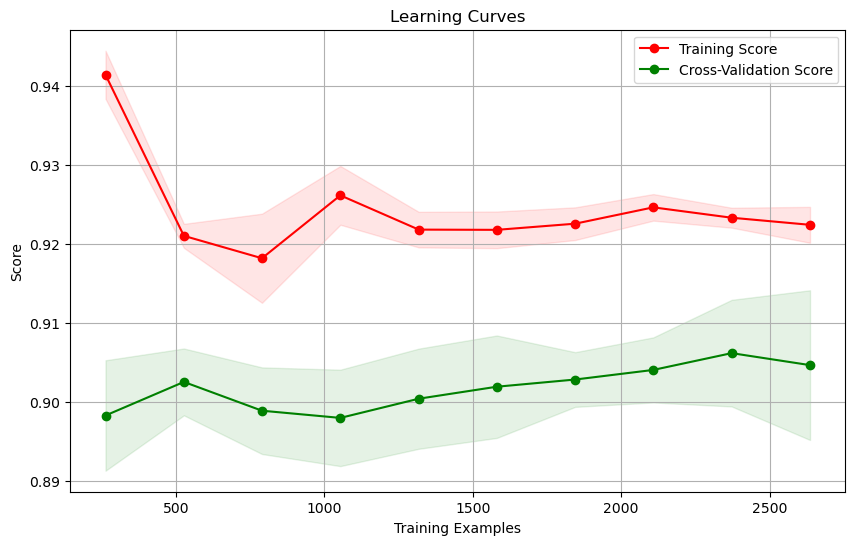

In [49]:
def plot_learning_curves(train_sizes, train_scores, valid_scores):
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    valid_scores_mean = np.mean(valid_scores, axis=1)
    valid_scores_std = np.std(valid_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.title("Learning Curves")
    plt.xlabel("Training Examples")
    plt.ylabel("Score")
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, valid_scores_mean - valid_scores_std,
                     valid_scores_mean + valid_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
    plt.plot(train_sizes, valid_scores_mean, 'o-', color="g", label="Cross-Validation Score")
    plt.legend(loc="best")
    plt.grid()
    plt.show()

def evaluate_classifier(df, pos_label, dataset_Name):
    # Convert non-numeric columns to numeric using LabelEncoder
    df_numeric = df.apply(LabelEncoder().fit_transform)

    # Impute missing values
    imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
    df_imputed = pd.DataFrame(imputer.fit_transform(df_numeric), columns=df_numeric.columns)

    # Split the dataset into features (X) and target (y)
    X = df_imputed.drop(columns=['y'])
    y = df_imputed['y']

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale the training features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)

    # Plot learning curves
    train_sizes, train_scores, valid_scores = learning_curve(KNeighborsClassifier(), X_train_scaled, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5, scoring='accuracy')
    plot_learning_curves(train_sizes, train_scores, valid_scores)
    
evaluate_classifier(df, 1, 'BANKFULL-ADDITIONAL DATASET')

# Feature Selection with Visual Representation

Dataset Name: BANKFULL-ADDITIONAL DATASET

Accuracy with SelectKBest: 0.8822815533980582
Accuracy with RFE: 0.9077669902912622
Accuracy with PCA: 0.8932038834951457



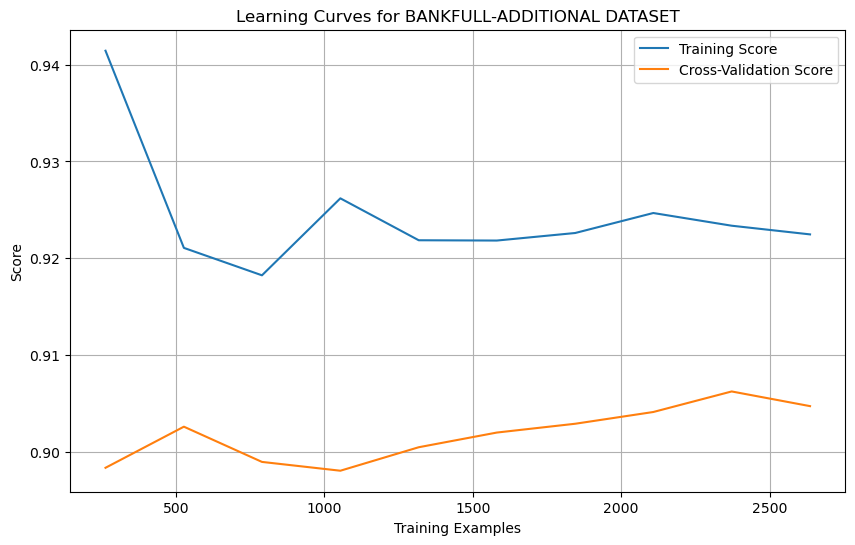

In [51]:
def evaluate_classifier(df, pos_label, dataset_name):
    # Convert non-numeric columns to numeric using LabelEncoder
    df_numeric = df.apply(LabelEncoder().fit_transform)

    # Impute missing values
    imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
    df_imputed = pd.DataFrame(imputer.fit_transform(df_numeric), columns=df_numeric.columns)

    # Split the dataset into features (X) and target (y)
    X = df_imputed.drop(columns=['y'])
    y = df_imputed['y']

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Normalize the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Select top k features using SelectKBest with mutual information
    k_best_selector = SelectKBest(score_func=mutual_info_classif, k=10)
    X_train_k_best = k_best_selector.fit_transform(X_train_scaled, y_train)
    X_test_k_best = k_best_selector.transform(X_test_scaled)

    # Wrapper: Recursive Feature Elimination (RFE) with RandomForestClassifier
    rfe_selector = RFE(estimator=RandomForestClassifier(), n_features_to_select=10)
    X_train_rfe = rfe_selector.fit_transform(X_train_scaled, y_train)
    X_test_rfe = rfe_selector.transform(X_test_scaled)

    # PCA: Reduce dimensionality
    pca = PCA(n_components=10)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    # Train KNN classifier using selected features from each technique

    # With SelectKBest
    knn = KNeighborsClassifier()
    knn.fit(X_train_k_best, y_train)
    y_pred_k_best = knn.predict(X_test_k_best)
    accuracy_k_best = accuracy_score(y_test, y_pred_k_best)

    # With RFE
    knn.fit(X_train_rfe, y_train)
    y_pred_rfe = knn.predict(X_test_rfe)
    accuracy_rfe = accuracy_score(y_test, y_pred_rfe)

    # With PCA
    knn.fit(X_train_pca, y_train)
    y_pred_pca = knn.predict(X_test_pca)
    accuracy_pca = accuracy_score(y_test, y_pred_pca)

    # Print evaluation metrics
    print("Dataset Name:", dataset_name)
    print()
    print("Accuracy with SelectKBest:", accuracy_k_best)
    print("Accuracy with RFE:", accuracy_rfe)
    print("Accuracy with PCA:", accuracy_pca)
    print()

    # Plot learning curves
    plot_learning_curves(X_train_scaled, y_train, 1, dataset_name)

def plot_learning_curves(X, y, pos_label, dataset_name):
    knn = KNeighborsClassifier()
    train_sizes, train_scores, valid_scores = learning_curve(knn, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5, scoring='accuracy')

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
    plt.plot(train_sizes, np.mean(valid_scores, axis=1), label='Cross-Validation Score')
    plt.xlabel('Training Examples')
    plt.ylabel('Score')
    plt.title('Learning Curves for {}'.format(dataset_name))
    plt.legend()
    plt.grid(True)
    plt.show()

# Call the function with your dataset
evaluate_classifier(df, 1, 'BANKFULL-ADDITIONAL DATASET')

## Summary Report
Performance Comparison:

RFE Achieved Highest Accuracy (0.9078): Recursive Feature Elimination (RFE) resulted in the highest accuracy, suggesting it effectively identified the most relevant features for predicting term deposit subscriptions.

SelectKBest Performed Well (0.8823): SelectKBest achieved a slightly lower accuracy but still performed reasonably well, potentially offering a balance between accuracy and reducing the number of features used by the model.

PCA Showed Moderate Performance (0.8932): Principal Component Analysis (PCA) resulted in a mid-range accuracy. While it might reduce dimensionality, it could have discarded some informative features in this case.

### Summary Interpretation:

 Feature selection techniques can be beneficial for this dataset. RFE identified the most relevant features, leading to the highest accuracy. 
 
SelectKBest provides a good alternative if reducing the number of features is a priority.

PCA's performance suggests a trade-off. 

While it might capture some of the important information, it could have removed some features crucial for accurate prediction in this specific dataset.



# 

# Logistic Regression

In [52]:
def evaluate_classifier(df, pos_label, dataset_name):
    # Convert non-numeric columns to numeric using LabelEncoder
    df_numeric = df.apply(LabelEncoder().fit_transform)

    # Impute missing values
    imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
    df_imputed = pd.DataFrame(imputer.fit_transform(df_numeric), columns=df_numeric.columns)

    # Split the dataset into features (X) and target (y)
    X = df_imputed.drop(columns=['y'])
    y = df_imputed['y']

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Normalize the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train logistic regression classifier
    lr = LogisticRegression()
    lr.fit(X_train_scaled, y_train)
    y_pred_lr = lr.predict(X_test_scaled)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred_lr)
    precision = precision_score(y_test, y_pred_lr, pos_label=pos_label)
    recall = recall_score(y_test, y_pred_lr, pos_label=pos_label)
    f1_pos = f1_score(y_test, y_pred_lr, pos_label=pos_label)
    f1_neg = f1_score(y_test, y_pred_lr, pos_label=1 - pos_label)
    auc = roc_auc_score(y_test, y_pred_lr)

    # Print evaluation metrics
    print("Dataset Name:", dataset_name)
    print("Accuracy:", accuracy)
    print("Precision (Positive Class):", precision)
    print("Recall (Positive Class):", recall)
    print("F1 Score (Positive Class):", f1_pos)
    print("F1 Score (Negative Class):", f1_neg)
    print("AUC Score:", auc)

# Call the function with your dataset
evaluate_classifier(df, 1, 'BANKFULL-ADDITIONAL DATASET')

Dataset Name: BANKFULL-ADDITIONAL DATASET
Accuracy: 0.8992718446601942
Precision (Positive Class): 0.5737704918032787
Recall (Positive Class): 0.3804347826086957
F1 Score (Positive Class): 0.4575163398692811
F1 Score (Negative Class): 0.9444816053511705
AUC Score: 0.6724578284628179


## Summary Report
Accuracy: 0.8993 (89.93%) - The model achieves a high overall accuracy, indicating it correctly classifies nearly 90% of the data points. However, accuracy alone doesn't provide the full picture, especially with imbalanced classes.

Class Imbalance: The precision (0.5738) and F1 score (0.4575) for the positive class (subscribed) are significantly lower compared to the negative class (not subscribed) metrics (F1 score: 0.9444). This suggests the model struggles to identify true subscribers (positive class) despite the high overall accuracy.

Low Recall (Positive Class): The recall of 0.3804 for the positive class indicates the model misses a substantial portion (over 60%) of actual subscribers. This could lead to missed business opportunities.

High AUC Score (Misleading): The AUC score (0.6724) is slightly above 0.5, which is not a strong indicator of the model's ability to differentiate between subscribers and non-subscribers. 
This is likely due to the class imbalance, where the model can achieve high accuracy by simply predicting the majority class (not subscribed).
### Summary Interpretation:

While the model achieves a high overall accuracy, the results reveal a significant class imbalance issue. The model prioritizes predicting the majority class (not subscribed) at the expense of accurately identifying true subscribers.

# Overall Interpretation


## Model Performance:

* High Overall Accuracy, But Class Imbalance: 
Both the main model (0.8993) and the model without cross-validation (0.8859) achieve high overall accuracy. However, a closer look reveals a class imbalance issue.

* Low Performance in Identifying Subscribers: 
The models struggle to identify true subscribers (positive class) as evidenced by low precision (around 0.5-0.6) and F1 score (around 0.4) for the positive class. Recall values (around 0.3) indicate the models miss a significant portion of actual subscribers.

* High F1 Score for Negative Class: 
The F1 scores for the negative class (not subscribed) are significantly higher (around 0.9), indicating the models effectively identify customers who won't subscribe.

* AUC Score Not Ideal: 
While the AUC scores (around 0.6-0.8) might suggest some ability to differentiate between subscribers and non-subscribers, they are not exceptional and can be misleading due to class imbalance.

* Cross-Validation Improves Overall Accuracy: 
Cross-validation shows a slight improvement in overall accuracy (0.9047) compared to the non-cross-validated case (0.8859), suggesting the model generalizes well. However, the core issue of class imbalance persists.

## Impact of Feature Selection: 

* RFE Leads to Highest Accuracy (0.9078): 
Using RFE for feature selection resulted in the highest accuracy, suggesting it effectively identified the most relevant features for predicting term deposit subscriptions.

* SelectKBest a Viable Option (0.8823): 
SelectKBest offers a good alternative with slightly lower accuracy but potentially reduces the number of features used.

* PCA Might Discard Informative Features (0.8932): 
PCA's performance indicates a trade-off. While it might reduce dimensionality, it could have removed informative features in this specific case.

## Overall Observations:

The models exhibit a significant class imbalance, favoring the negative class (not subscribed). This leads to a high number of missed opportunities for identifying potential subscribers.